![](img/logo.png)

# Unsupervised learning with Scikit-learn

## Yoav Ram

In this session we will discuss PCA and Kmeans as examples of unsupervised learning.

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats

from sklearn.datasets import load_digits, load_iris, fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

import warnings
warnings.simplefilter('ignore', FutureWarning)

sns.set_context('talk')
sns.set_style('ticks')

def pca_labels():
    plt.xlabel('PC1')
    plt.ylabel('PC2')

# Example: synthetic data

We start with a simple example using some mock data `X`.

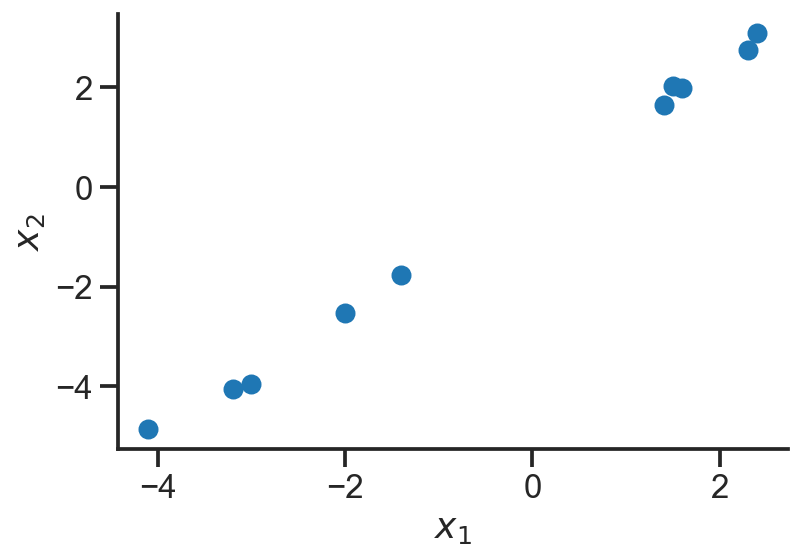

In [3]:
X = np.array([
    [1.4, 1.65],
    [1.6, 1.975],
    [-1.4, -1.775],
    [-2, -2.525],
    [-3, -3.95],
    [2.4, 3.075],
    [1.5, 2.025],
    [2.3, 2.75],
    [-3.2, -4.05],
    [-4.1, -4.85]
])
n = X.shape[0]

plt.plot(X[:,0], X[:,1], 'o')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
sns.despine()

The goal is to transform these two highly correlated variables, $x_1$ and $x_2$, into one variable that has most of the information in $x_1$ and $x_2$.

Our objective is to transform the data, using only rotation and reflections (or in general, orthogonal transformations), so that the transformed x-axes, called the first principle component, will account for as much of the variability in the data as possible.

Note: PCA is normally applied to multidimensional data, but the idea is the same: each subsequent principal component should account for as much unexplained variability as possible.

We use Scikit-learn's `PCA` model. The `fit_transform` will both find the set of transformations and apply them to the data, producing the transofrmed data `X_`.

The plot shows the original data in blue and the transformed data in orange, with arrows pointing from original to transformed.

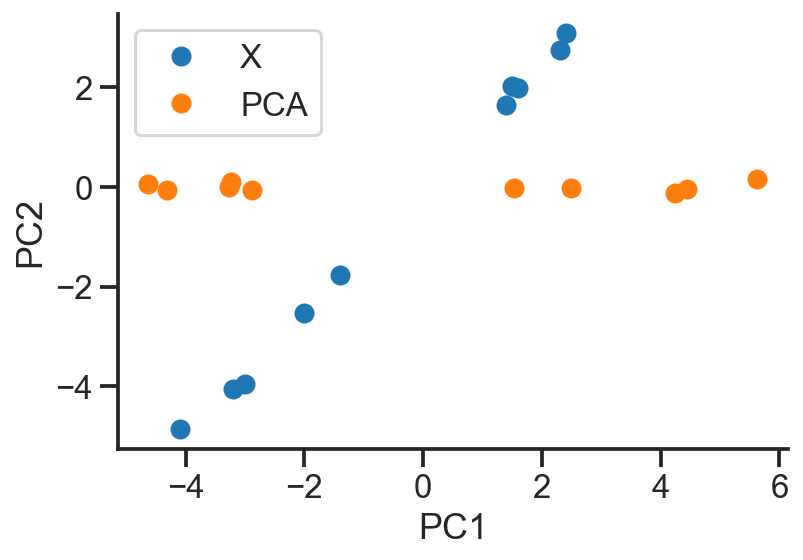

In [4]:
pca = PCA()
X_ = pca.fit_transform(X)

plt.plot(X[:,0], X[:,1], 'o', label='X')
plt.plot(X_[:,0], X_[:,1], 'o', label='PCA')

for j in range(X.shape[0]):
    x1, x2, x1_, x2_ = X[j,0], X[j,1], X_[j,0], X_[j,1]
    plt.arrow(x1, x2, x1_-x1, x2_-x2, head_width=0.2, length_includes_head=True, fc='none')
    
pca_labels()
plt.legend(loc='upper left')
sns.despine()

# Technical details

Our data matrix $X$ of shape $n$-by-$m$, is composed of a column of length $n$ for each feature $x_1, x_2, \ldots, x_m$.

We assume that the features are already normalized, that is, that $E[x_k] = 0$ for all $k$; otherwise, we redefine $x_k \leftarrow x_k - E[x_k]$. 

We are looking for a projection matrix $A$ in which each colum is a vector defining the direction of one of the new axes, and these columns must be orthogonal (and even orthonormal, $A^T A = I$). 

Then $A$ is an $m$-by-$m$ matrix, with columns $a_1, \ldots, a_m$.

The data after the project is $\tilde X$:
$$
\tilde X = X \cdot A^T
$$

The first projected column $\tilde  x_1$, or feature, is called the first **principal component** and denoted PC1. It is defined by
$$
\tilde x_1 = X \cdot a_1
$$
and we want to find $a_1$ that maximized $Var[\tilde x_1]$ subject to the constraint $a_1^T a_1=1$.

By definition of variance,

$$
Var[\tilde x_1] = E[\tilde x_1 ^2] - E[\tilde x_1]^2
$$

To proceed, note that for $E[\tilde x_1] = E[X \cdot a_1] = 0$ becuase we assumed $E[x_k]=0$ for all $k$, so (all expectations are over the data samples):

$$
Var[\tilde x_1] = 
E[\tilde x_1 ^2] = \\ 
E[(X \cdot a_1)^2] = E[X \cdot a_1 \cdot X \cdot a_1] = \\
E[(X \cdot a_1)^2] = E[X \cdot a_1 \cdot X \cdot a_1] = a_1 E[X^T X] a_1 ^T = \\
a_1 S a_1 ^T
$$
where $S=E[X^T X]$ is the covariance matrix of $X$.

Then, we are looking for $a_1$ that maximizes $a_1 S a_1 ^T$ with the constraint $a_1 ^T a_1 = 1$.

This is an optimization problem that can be solved using the method of Lagrange multipliers.
That is, we are looking for $a_1, \lambda$ that maximize the expression
$$
L(a_1, \lambda) = a_1 S a_1 ^T - \lambda (a_1 a_1^T - 1)
$$
To find the max, we take the derivative with respect to $a_1$ and set it to zero:
$$
\frac{\partial L}{a_1} = 2 a_1 S - 2 \lambda a_1 = 0 \Rightarrow \\
a_1 S = \lambda a_1
$$
So, $\lambda$ is an eigenvalue of $S$ and $a_1$ is its corresponding eigenvector.

Moreover, we get:
$$
Var[\tilde x_1] = a_1 S a_1^T = \lambda a_1 a_1 ^T = \lambda
$$
So the eigenvalue of $S$ equals the variance of $\tilde x_1$.

This process holds for all $\tilde x_k$.

Therefore, the eigenvalues of $S$ are the variances of the projected data, or the new features, and the eigenvectors of $S$ are new projection axes.

## Exercise: PCA implementation

To make sure you understand correctly, **write the Python code corresponding to the above mathematical derivation**.

In [6]:
# your code here

S =
 [[ 6.64777778  8.27138889]
 [ 8.27138889 10.310625  ]]

λ = 16.950918251164786 0.007484526612989484 16.958402777777778

VAR PC1:,  0.9995586538006516

A =
 [[-0.62602679 -0.77980155]
 [-0.77980155  0.62602679]]

X_ =
 [[-2.8873595  -0.05441848]
 [-3.26600036 -0.00692008]
 [ 1.53633582 -0.01511587]
 [ 2.49680306 -0.01675502]
 [ 4.23404706 -0.12904164]
 [-4.6246035   0.05786814]
 [-3.24238776  0.10236141]
 [-4.30856532 -0.06761041]
 [ 4.43723257 -0.03568401]
 [ 5.62449792  0.16531596]]


The is the same plot as above, but uses `X_` that you reproduced in the above cell.

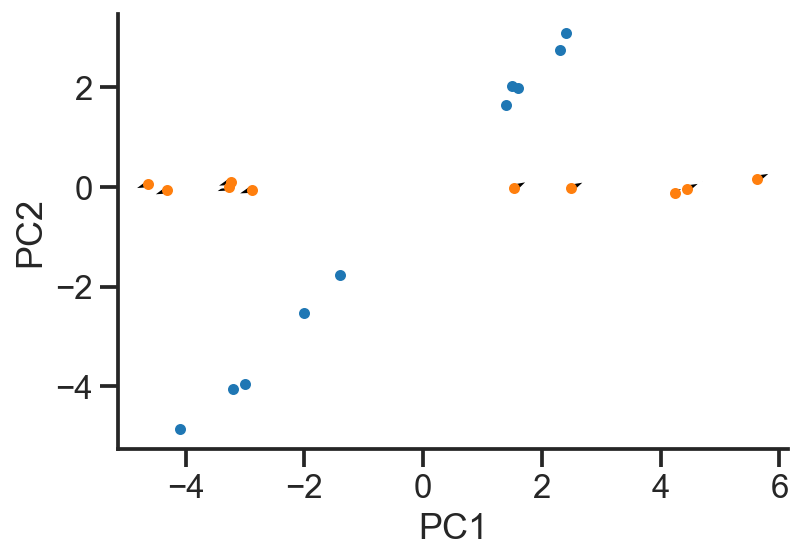

In [7]:
plt.plot(X[:,0], X[:,1], '.', label='X')
plt.plot(X_[:,0], X_[:,1], '.', label='PCA')

for j in range(X.shape[0]):
    x1, x2, x1_, x2_ = X[j,0], X[j,1], X_[j,0], X_[j,1]
    dx1, dx2 = x1_ - x1, x2_ - x2
    plt.arrow(x1, x2, dx1, dx2, head_width=0.2, fc='k')# length_includes_head=True, fc='none')
pca_labels()
sns.despine()

# Example: Iris dataset

We now proceed to an intermediate number of dimensions: the Iris dataset that we have encountered in the machine learning session.

In [10]:
X, y = load_iris(return_X_y=True)
X = scale(X) # scaling is important for PCA (like most linear models)
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

colors = sns.color_palette('Set1', 3)
cmap = [colors[y_] for y_ in y]

df = pd.DataFrame(data=X, columns=feature_names)
df['target'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


Since the Iris dataset is labeled (targets are included), we can use it to demonstrate the potential of PCA for classification.

Start by plotting the original dataset, but only with the petal length and petal width, which we already determined are the best two variables to use for k-nearest neighbors.

We use text plotting to plot the short name of each Iris label.

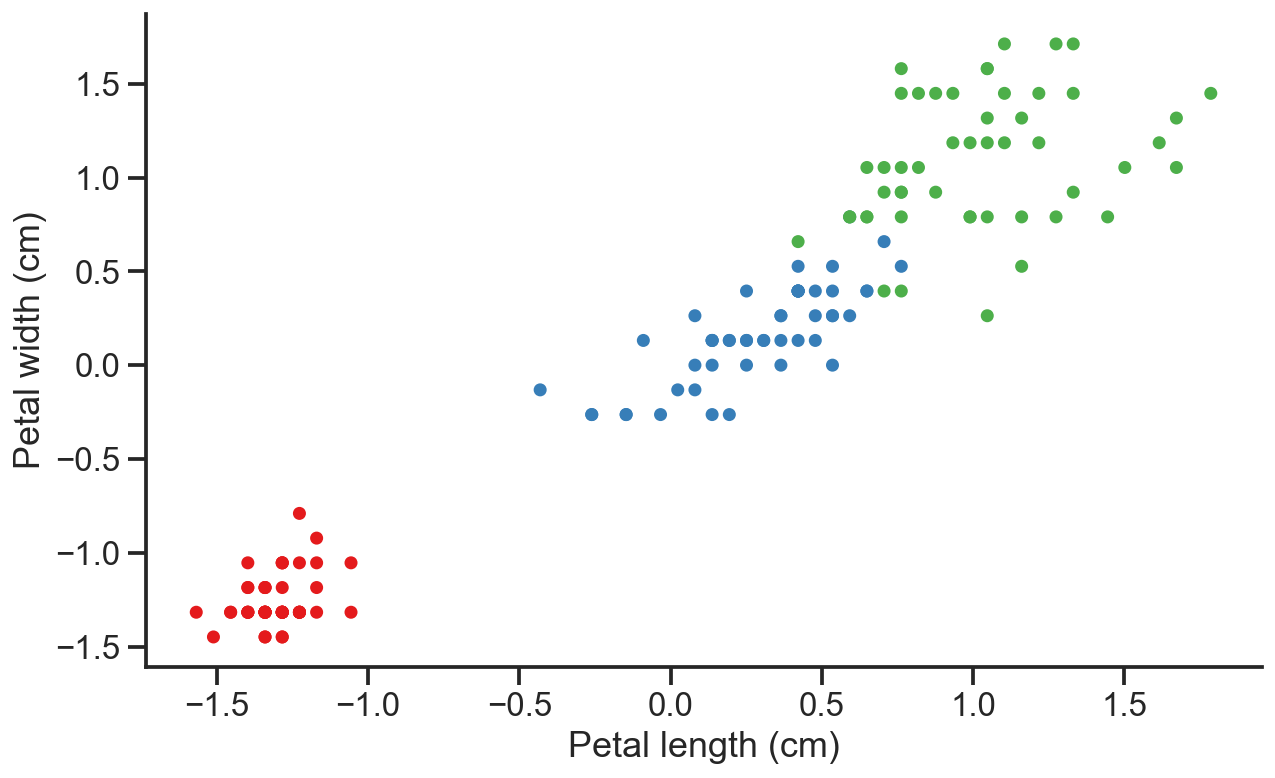

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X[:, 2], X[:, 3], c=cmap, s=25)
ax.set_xlabel('Petal length (cm)')
ax.set_ylabel('Petal width (cm)');
sns.despine()

Now we use PCA to transform the entire Iris dataset to a 2D space.

Note: the use of `scale` on the data to make sure that all variables have the same scale.

In [12]:
pca = PCA(n_components=2)
X_ = pca.fit_transform(X)

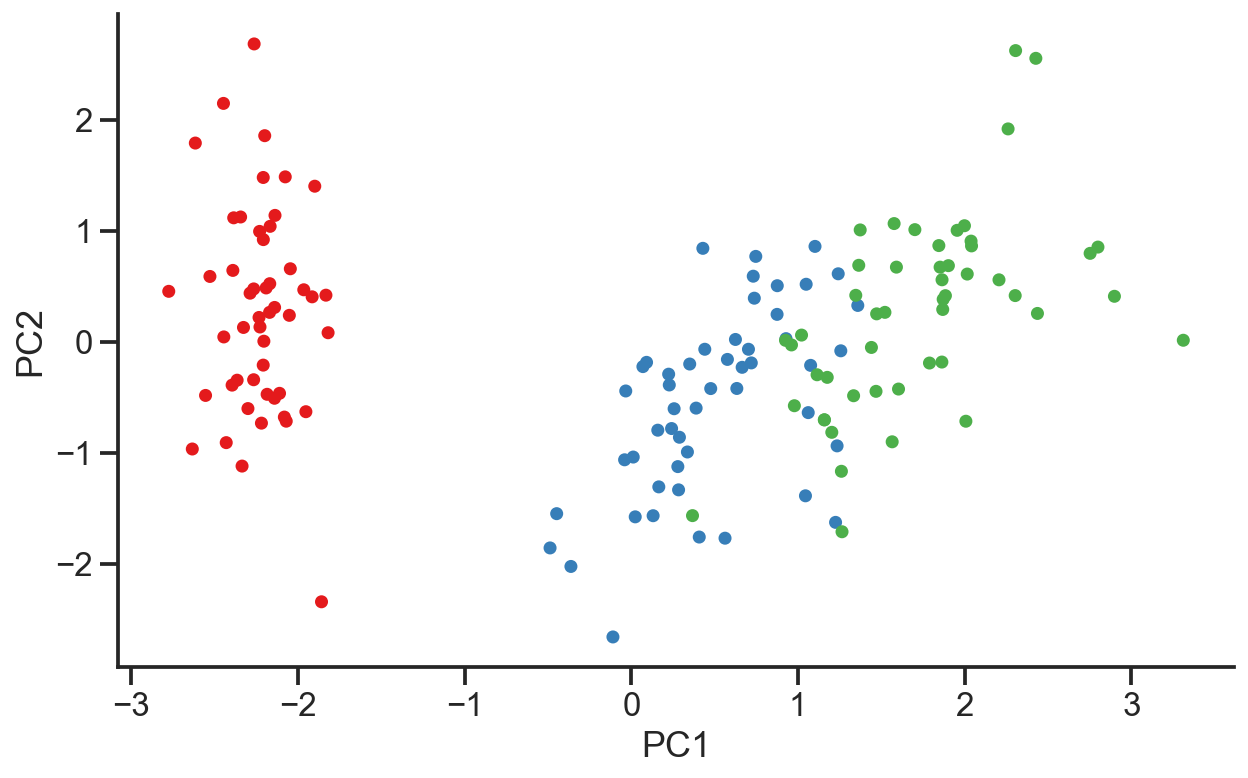

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X_[:, 0], X_[:, 1], c=cmap, s=25)
pca_labels()
sns.despine()

# Exercise: Digits dataset

Now we load the digits dataset. This is a dataset of handwritten digits saved as 8-by-8 images.
The images are made of 64 pixel values between 0 and 16 -- this is a high-dimensional problem.

In [14]:
# load data from sklearn
digits = load_digits()
X = digits.data
Y = digits.target

n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

Digit: 9


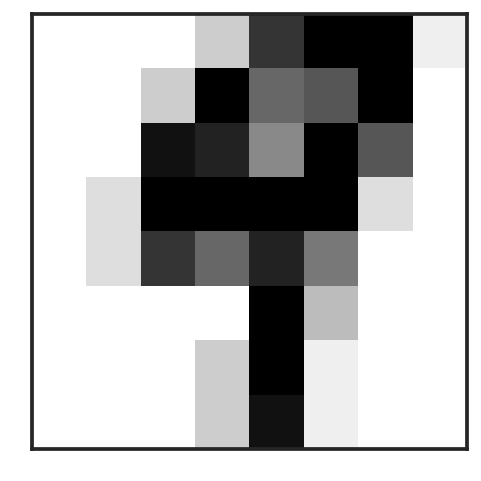

In [15]:
def plot_digit(im, ax=None):
    if ax is None: fig, ax = plt.subplots()
    ax.imshow(im, norm=BoundaryNorm(np.unique(X), 255), cmap='gray_r')
    ax.set(xticks=[], yticks=[])

idx = np.random.choice(X.shape[0])
im = X[idx].reshape((8, 8))
plot_digit(im)
print("Digit:", labels[idx])

**Use PCA to project the dataset to a 2D space and plot the digits.**

Use a different color for each digit (i.e. label) and possibly plot using text digits.

The plot will show us what digits are "close" to each other, which should reflect some measure of similarity.

Does it make sense? Did you expect 0 to be close to 9 and 6? 4 close to 6? 7 and 1?

Generating this exact plot may be difficult.
Start by plotting with markers (`plt.plot` or `plt.scatter`) and when it works, try to use `plt.text` instead.
If you manage to do something similar, that's OK, and you can always look at the [solution](../solutions/PCA.ipynb).

In [16]:
# your code here

In [54]:
def plot_digit_pca(X_):
    colors = sns.color_palette('Set1', 10)

    PC1 = X_[:, 0]
    PC2 = X_[:, 1]

    fig, ax = plt.subplots(figsize=(12, 10))
    for pc1, pc2, s in zip(PC1, PC2, labels):
        c = colors[s]
        ax.text(pc1, pc2, str(s), fontdict=dict(fontsize=10, color=c))
    ax.set_xlim(PC1.min()-1, PC1.max()+1)
    ax.set_ylim(PC2.min()-1, PC2.max()+1)
    ax.set_xticks([])
    ax.set_yticks([])
    pca_labels()
    sns.despine()

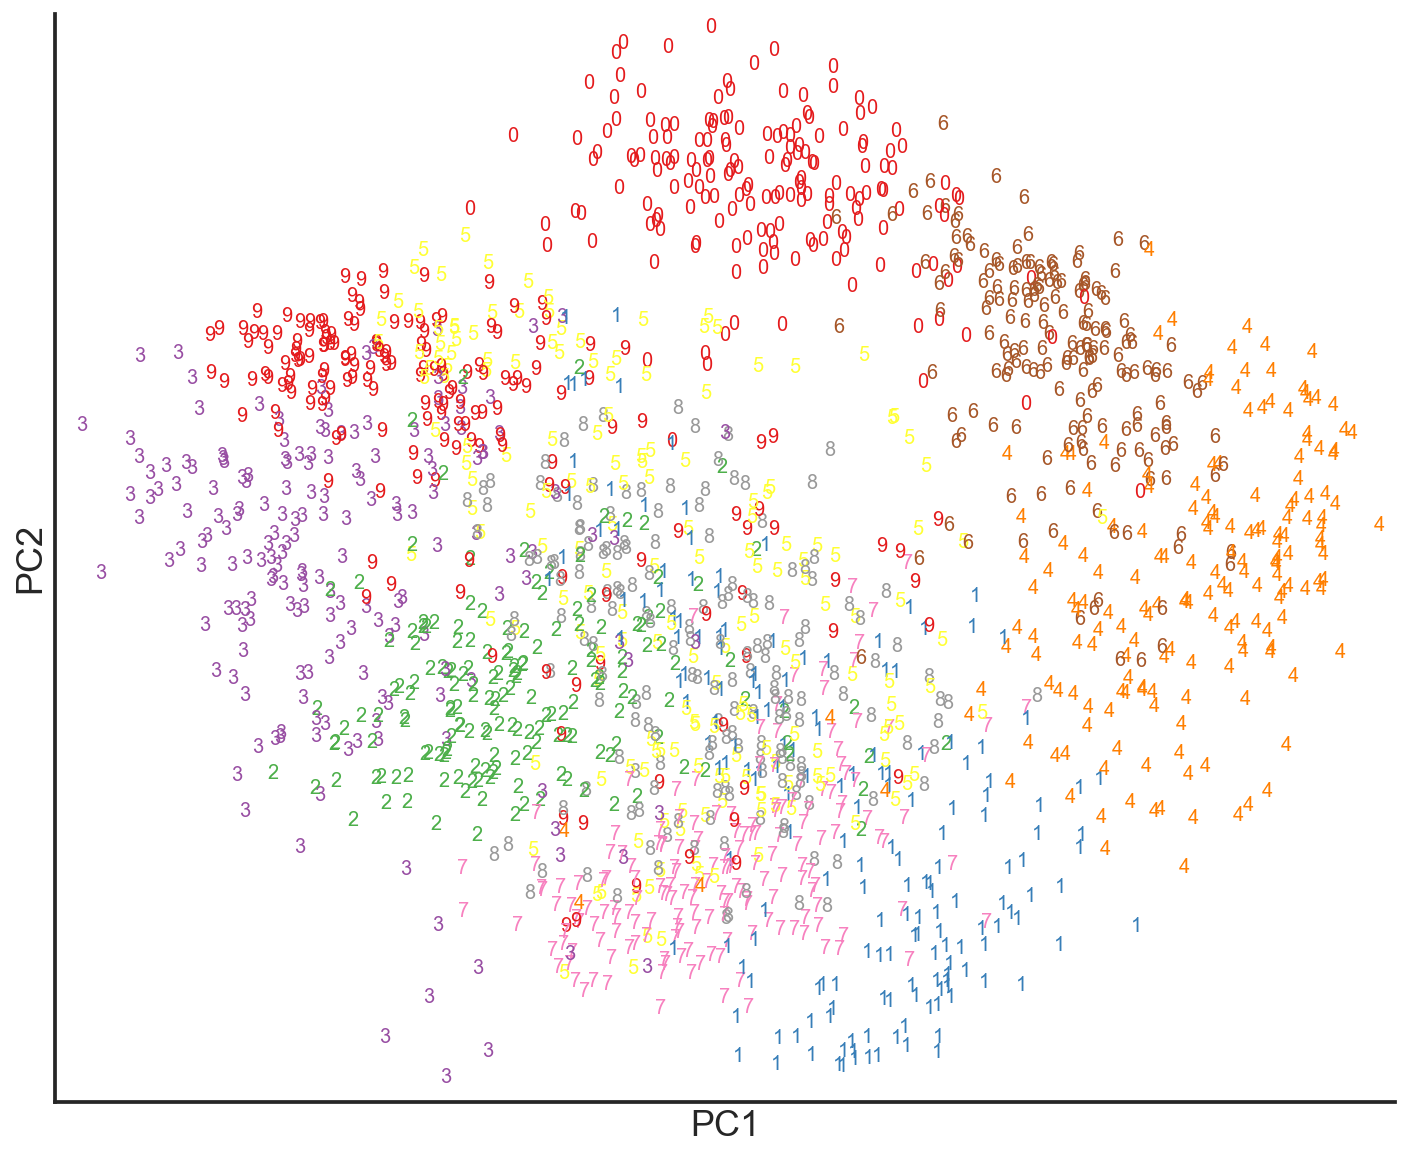

In [17]:
plot_digit_pca(X_)

In high-dimensional cases it is interesting to see the % of variance explained by each principal component.
In this case we can see that the first 3-4 components explain 40%-50% of the variance.

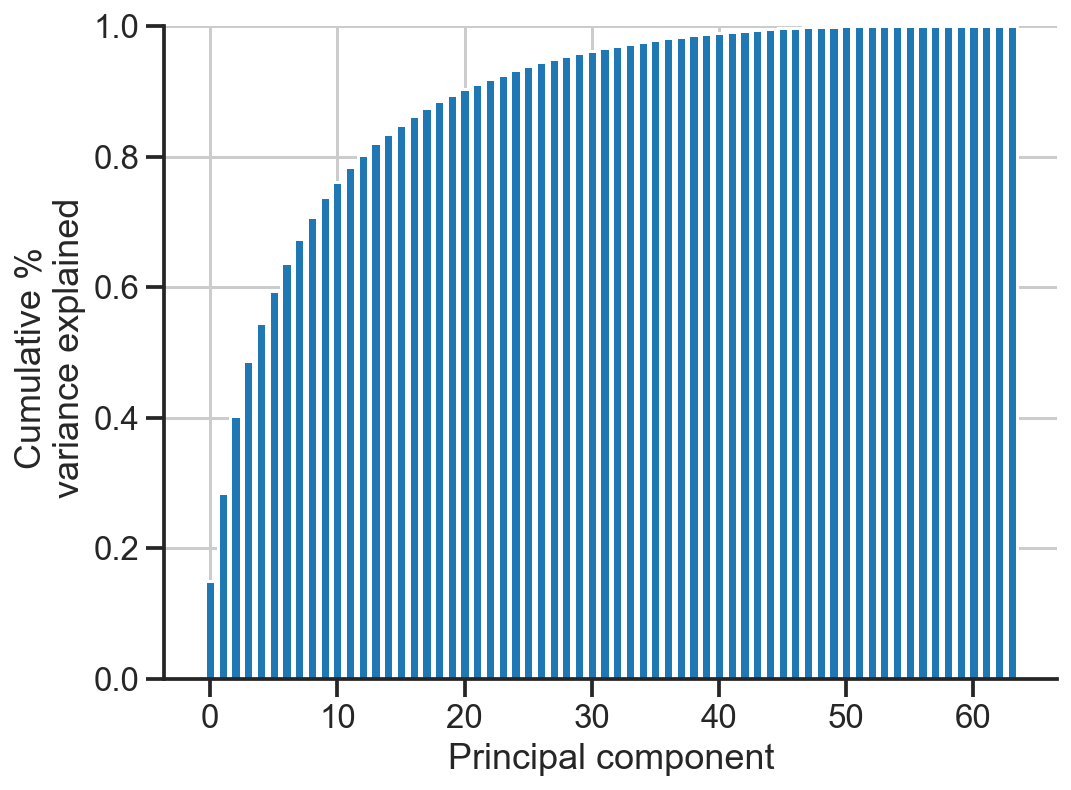

In [18]:
var = pca.explained_variance_ratio_
cumvar = np.cumsum(var)

plt.figure(figsize=(8, 6))
plt.grid(True)
plt.bar(range(n_features), cumvar)
plt.xlabel('Principal component')
plt.ylabel('Cumulative % \n variance explained')
plt.ylim(0, 1)
sns.despine()

# t-SNE

Another method for dimensionality reduction that is becoming increasingly popular is 
_t-Distributed Stochastic Neighbor Embedding_, or t-SNE.
t-SNE is probablistic method, rather than an algebraic method.

It is very easy to use t-SNE in Scikit-learn: **swap `PCA` for `TSNE`**, fit the model to the data, and plot the results.

In [60]:
%%time
tsne = TSNE()
X_ = tsne.fit_transform(X)

CPU times: user 42 s, sys: 1.28 s, total: 43.3 s
Wall time: 6.04 s


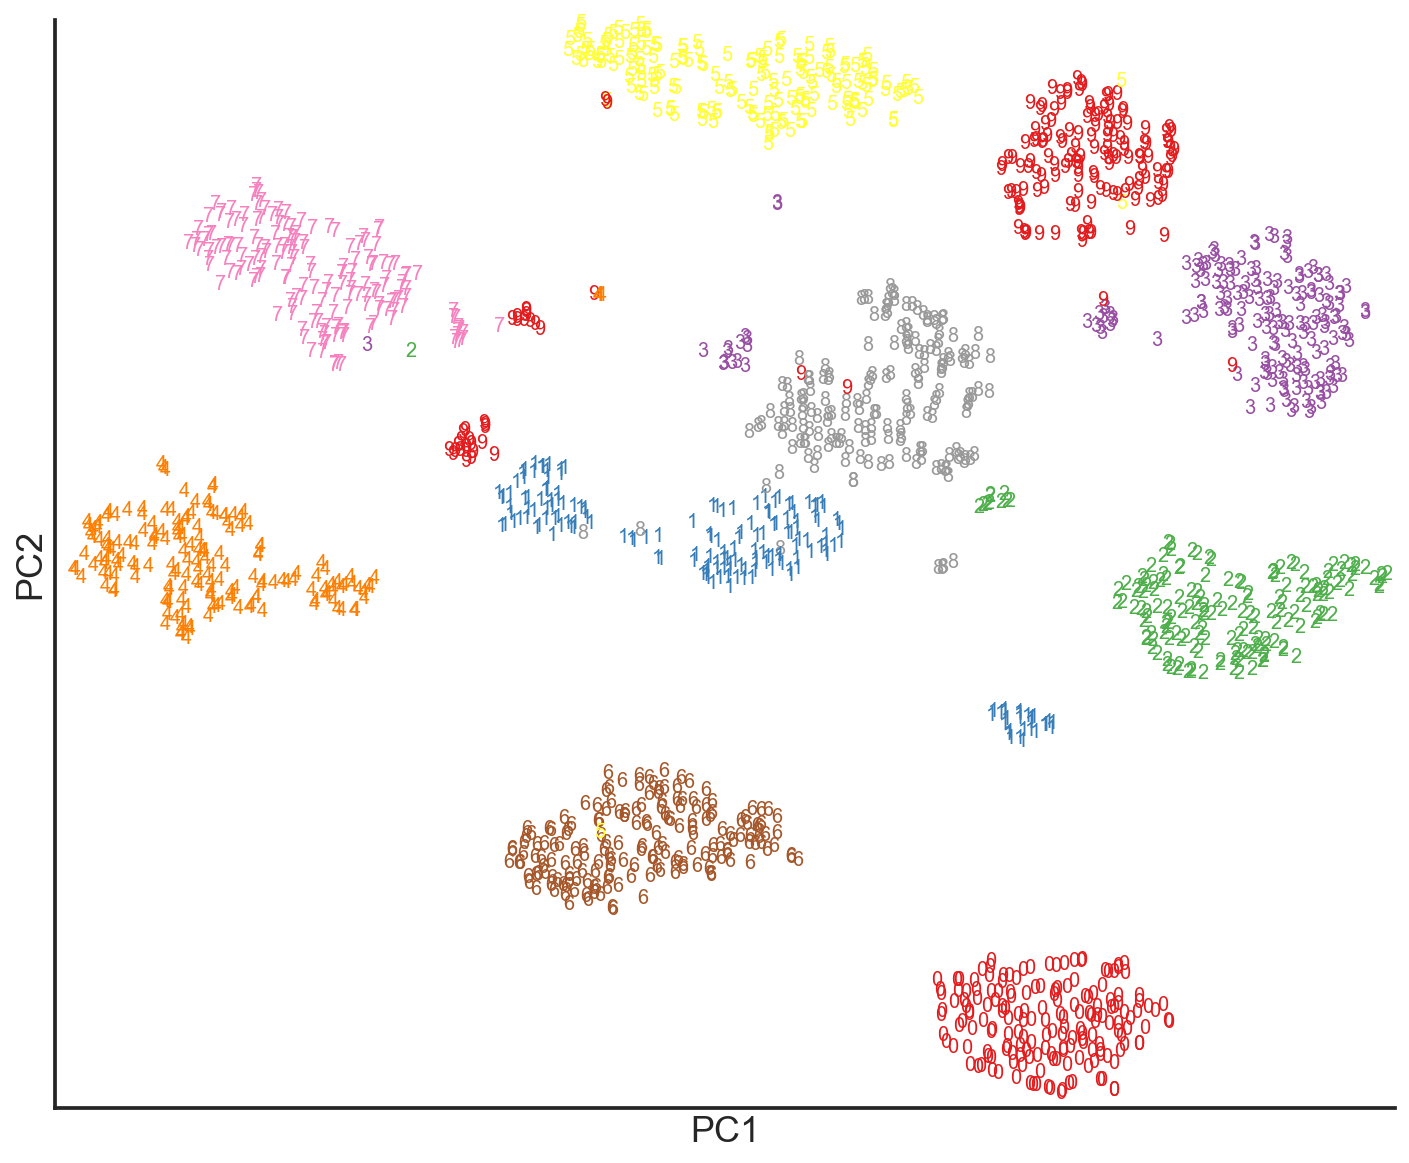

In [61]:
plot_digit_pca(X_)

As you can see, t-SNE produces a much better separation between the different clusters of points, even clustering those rouge 9s between the 7s and 1s together.

# UMAP

A new alternative for t-SNE is [UMAP](http://umap-learn.readthedocs.io). It is faster, but it requires a separate installation: `conda install umap-learn`.

In [52]:
from umap import UMAP

In [64]:
%%time
umap = UMAP(n_neighbors=5)
X_ = umap.fit_transform(X)

CPU times: user 9.4 s, sys: 195 ms, total: 9.6 s
Wall time: 4.16 s


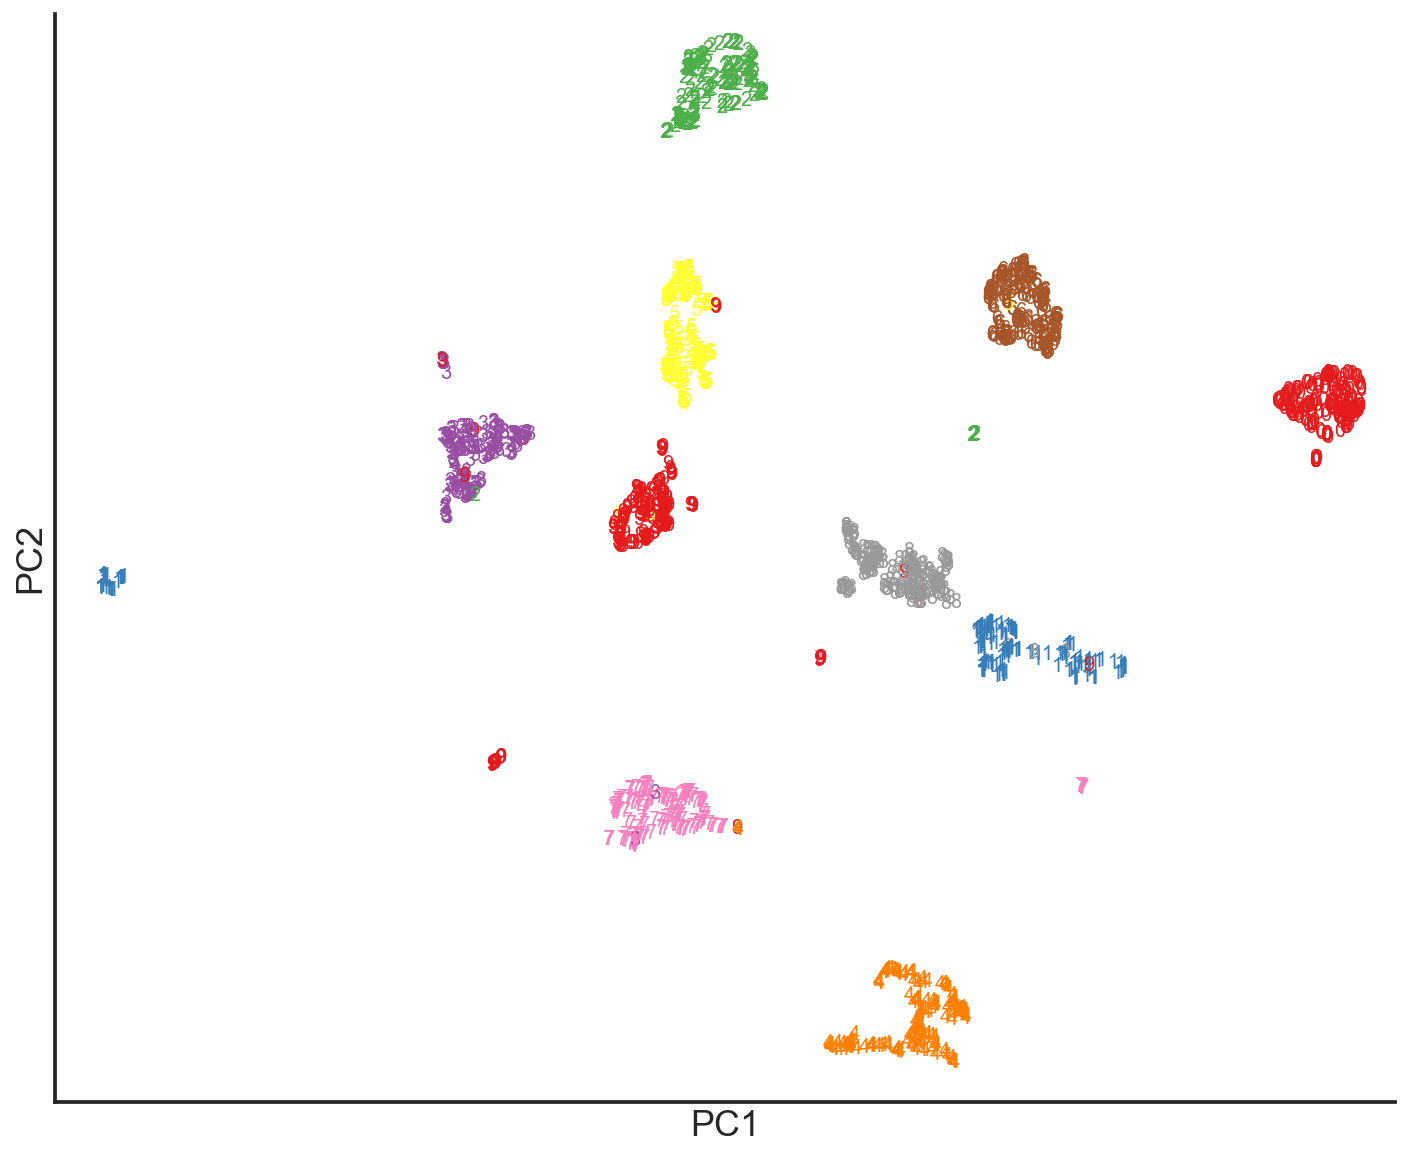

In [65]:
plot_digit_pca(X_)

# K-means clustering

K-means clustering aims to partition n observations into _k_ clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster (see [Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)). There's a good visual explanation [here](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/).

As usual in Scikit-learn, we start by creating the model and fitting it to the data.
This is an unsupervised learning algorithm, so `y` is not required (and indeed ignored if given).

In [24]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

KMeans(n_clusters=10)

Now we can do several things. First, lets look at the centeroid of each cluster by taking `cluster_centers_`.

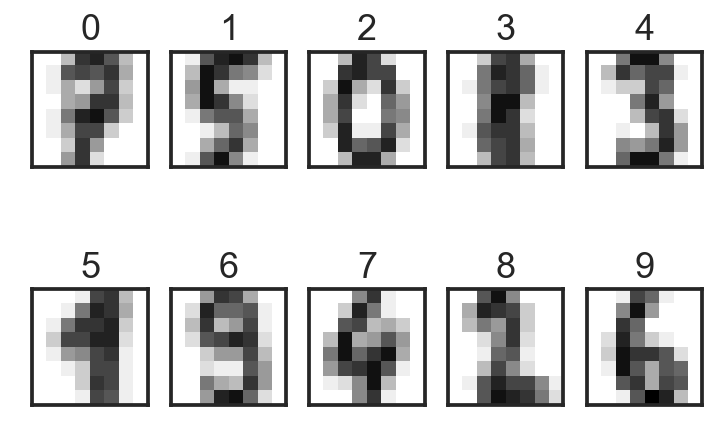

In [25]:
fig, axes = plt.subplots(2, 5)
for cluster, cluster_center, ax in zip(range(10), kmeans.cluster_centers_, axes.flat):
    ax.set_title(cluster)
    plot_digit(cluster_center.reshape((8, 8)), ax=ax)

We can also `predict` on the test data to get the cluster of each test sample.

Remember - the cluster identifier is not the digit but rather a reference to the above cluster centroids.

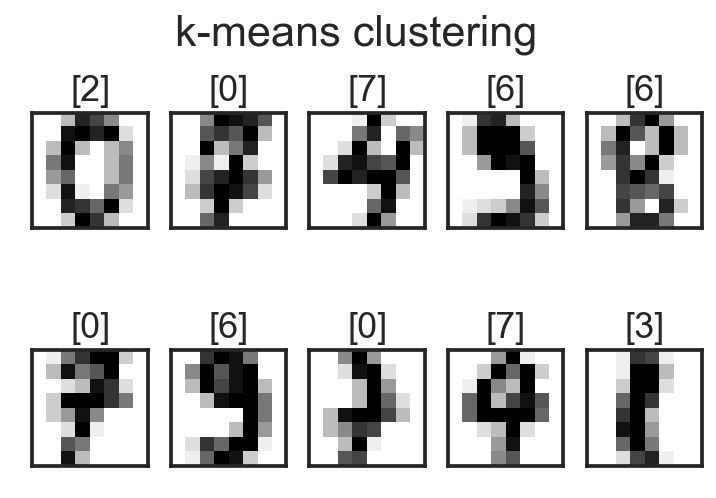

In [36]:
fig, axes = plt.subplots(2, 5)
for ax in axes.flat:
    im = X[np.random.choice(X.shape[0])]
    cluster = kmeans.predict(im.reshape((1, -1))) # sklearn expects 2D arrays even for a single example
    ax.set_title(cluster)
    plot_digit(im.reshape((8,8)), ax=ax)
    fig.suptitle("k-means clustering")

## Visualization

If we first apply PCA to the data, then we can apply K-means on PCA-reduced data, which will allow us to plot the results.

Here we can see the PCA transformed points in black circles, the K-means centroids in white x-marks, and the K-means clusters in different background colors.

In [47]:
def plot_kmeans(X, kmeans):
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_[:, 0].min() - 1, X_[:, 0].max() + 1
    y_min, y_max = X_[:, 1].min() - 1, X_[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # predict clusters for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])


    # put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(X_[:, 0], X_[:, 1], 'k.', markersize=2)
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.xlabel('PC1')
    plt.ylabel('PC2')

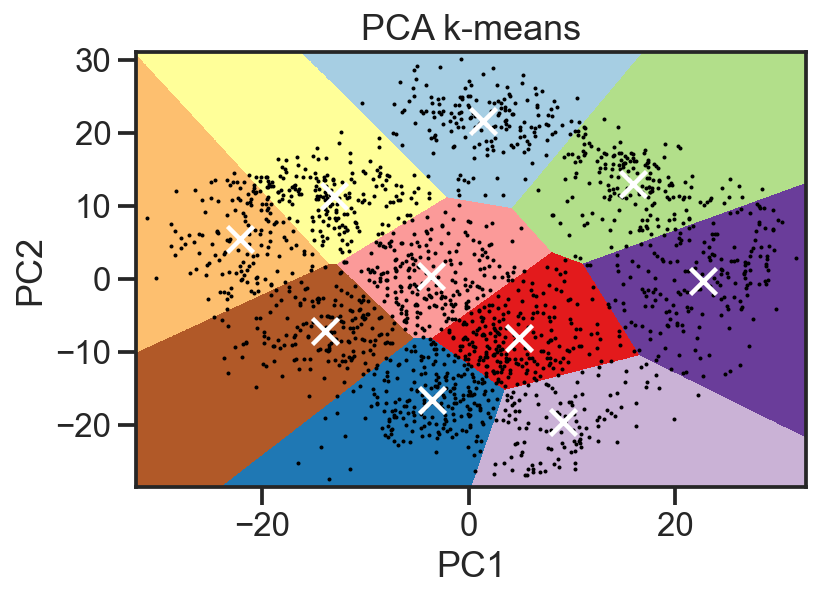

In [66]:
pca = PCA(n_components=2)
X_ = pca.fit_transform(X)

kmeans = KMeans(n_clusters=10)
kmeans.fit(X_)
plot_kmeans(X_, kmeans)
plt.title('PCA k-means');

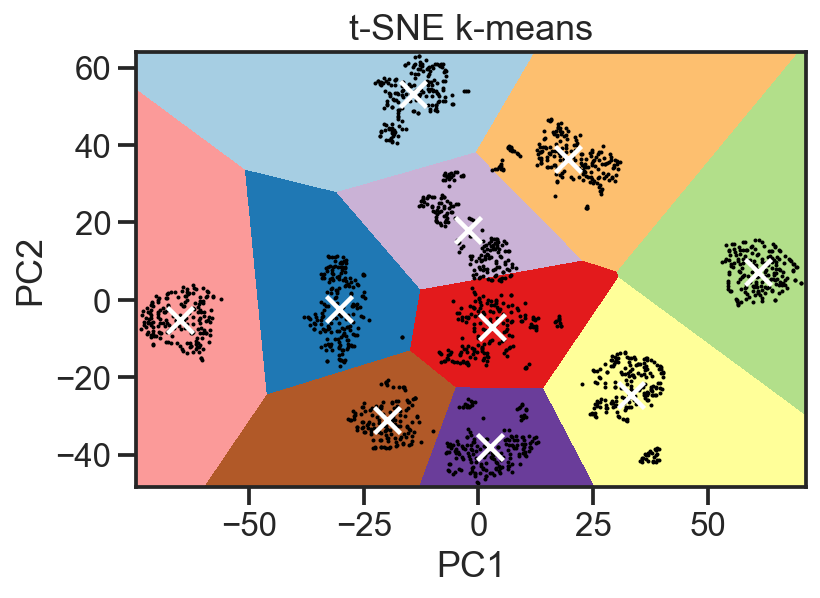

In [67]:
tsne = TSNE()
X_ = tsne.fit_transform(X)
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_.astype('float64'))
plot_kmeans(X_.astype('float64'), kmeans)
plt.title('t-SNE k-means');

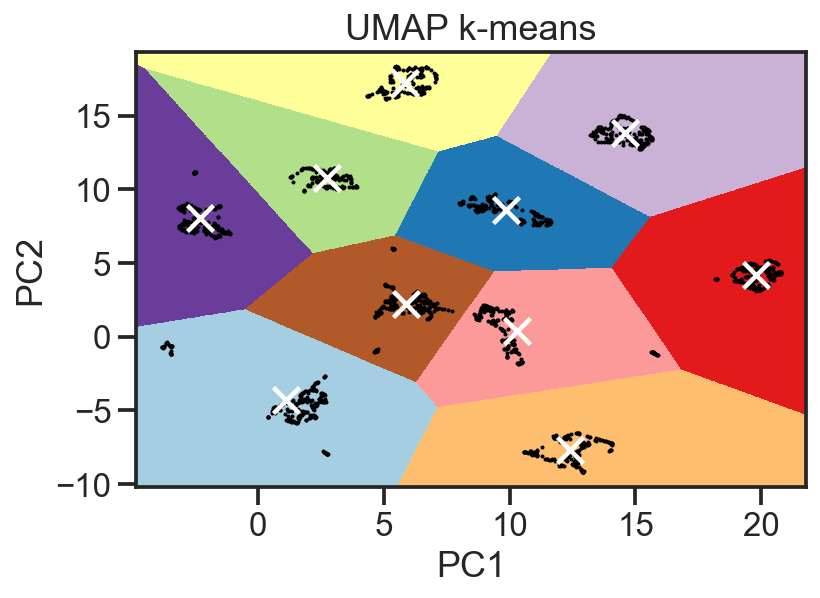

In [70]:
umap = UMAP(n_neighbors=5)
X_ = umap.fit_transform(X)
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_.astype('float64'))
plot_kmeans(X_.astype('float64'), kmeans)
plt.title('UMAP k-means');

# Face images

We now load the Olivetti face dataset.

In [71]:
def plot_face(img, ax=None):
    if ax is None: fig, ax = plt.subplots()
    ax.imshow(img.reshape(img_shape), cmap='bone')
    ax.set(xticks=[], yticks=[])
    return ax

X, y = fetch_olivetti_faces(return_X_y=True)
img_shape = 64, 64

The dataset contains images of several persons - we will display the first 8 persons.

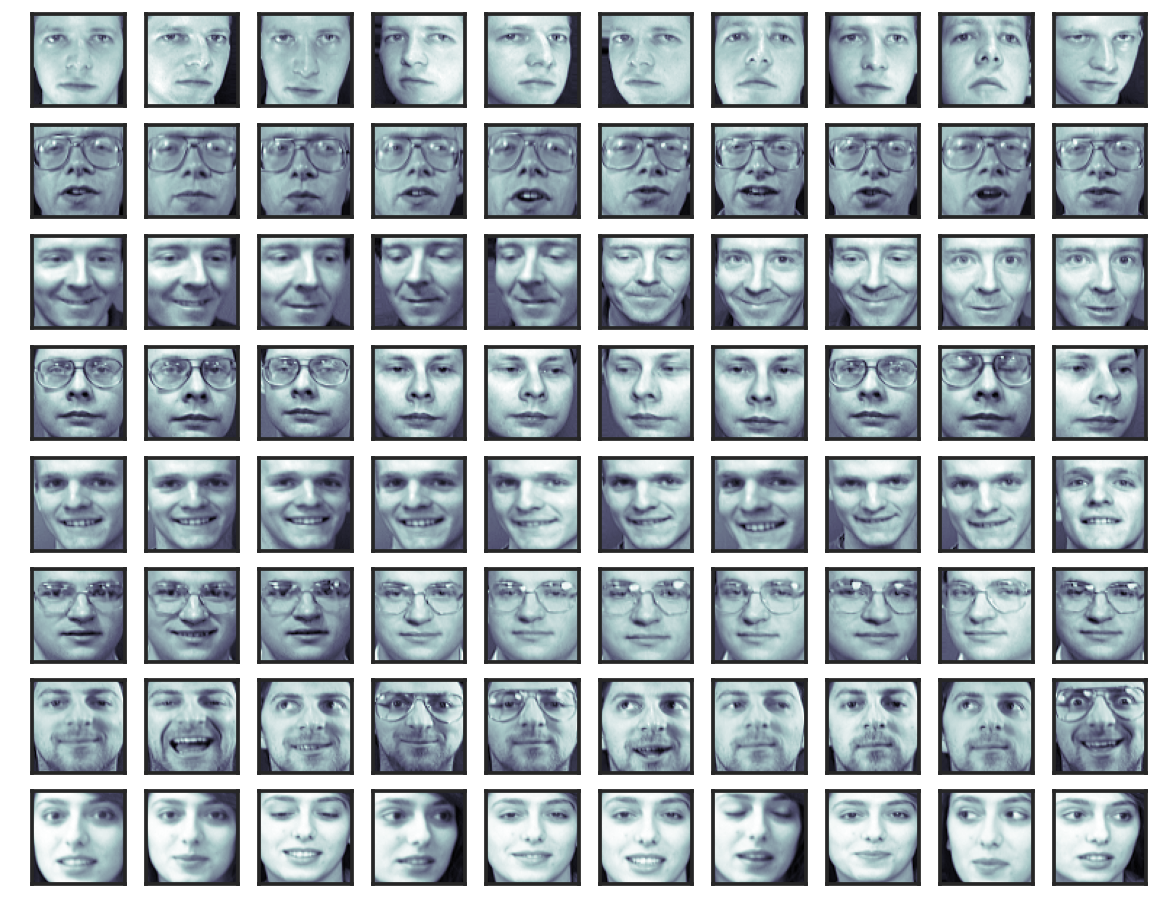

In [72]:
fig, axes = plt.subplots(8, 10, figsize=(10, 8))
for i, ax in enumerate(axes.flat):
    plot_face(X[i], ax=ax)    

Lets also look at the mean face, as PCA will arrange the images around their mean.

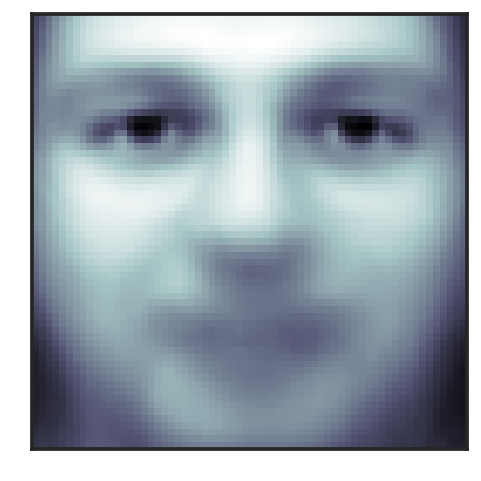

In [73]:
plot_face(X.mean(axis=0));

Now lets apply PCA to the images.

Note that we will do a train test split to see how this analysis works for unseen (test) data.

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [75]:
pca = PCA()
pca.fit(X_train)

PCA()

We can plot the cumulative explained variance ratio. It is interesting that 5 dimensions are enough for > 50%.

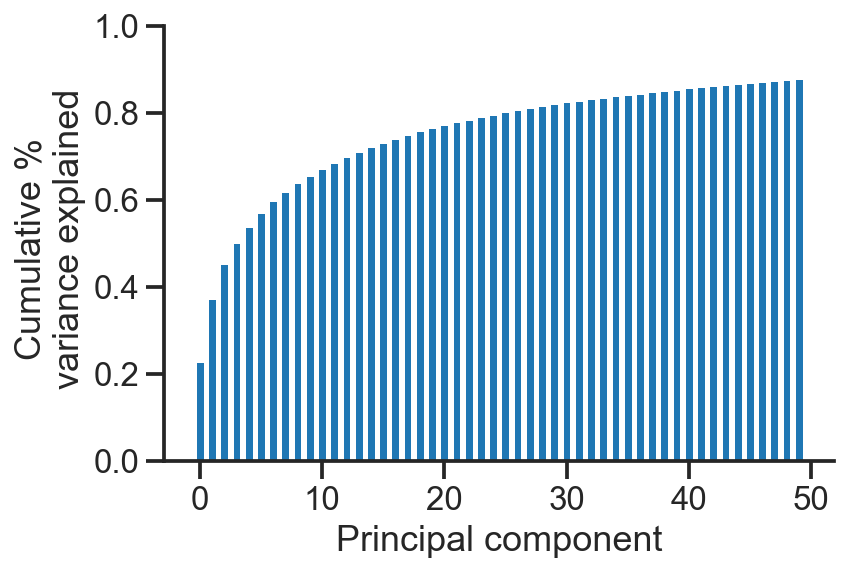

In [76]:
var = pca.explained_variance_ratio_
cumvar = np.cumsum(var)

plt.bar(range(50), cumvar[:50])
plt.xlabel('Principal component')
plt.ylabel('Cumulative % \n variance explained')
plt.ylim(0, 1)
sns.despine()

Now lets visualize the principle components -- these are also called _eigenfaces_.
Each of the 50 components maps the pixels of the images into its dimension, similar to coefficients in a linear model. Indeed, PCA is a linear model to a smaller space.

We will look at the first 20 components.

In [77]:
pca.components_.min(), pca.components_.max()

(-0.09979731, 0.10689711)

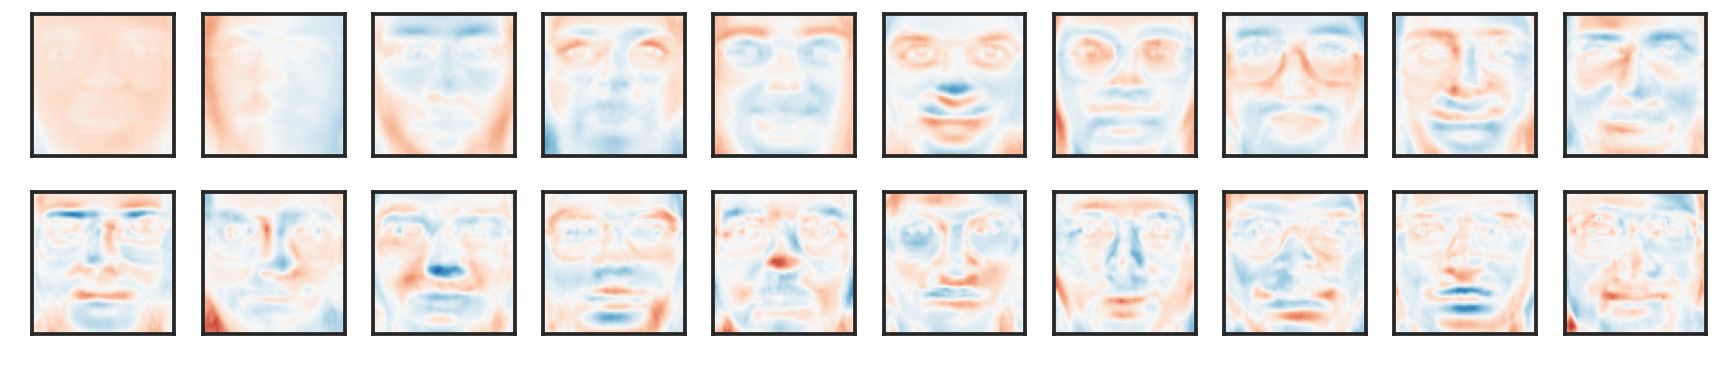

In [80]:
fig, axes = plt.subplots(2, 10, figsize=(15, 3))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i,:].reshape((64, 64)), cmap='RdBu', vmin=-0.1, vmax=0.1)
    ax.set(xticks=[], yticks=[])

It appears that the first components are about lighting (from the front, from the right), and the next ones are about facial features: eye-brows, eyes, nose, glasses, mouth.

We can transform a face, change one of the PCs, then transform it back to a face and see the result.

Note: PC values are between -2 and 2.

Let's change the right-left lighting using PC2 or add glasses using pc 19.

In [96]:
pc = 19
factor = 5
idx = 0

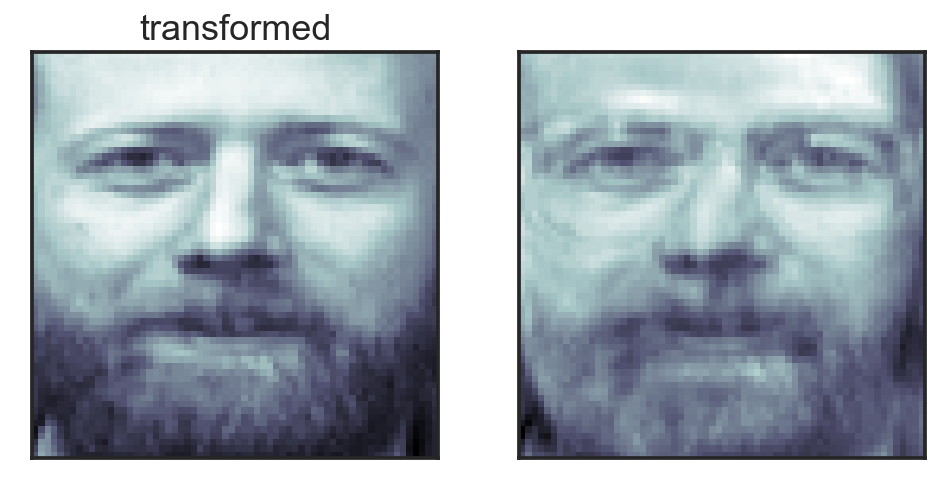

In [97]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))
face = X_train[idx].copy()
plot_face(face, ax=axes[0])
axes[0].set_title('original')
face_pca = pca.transform(face.reshape((1, -1)))
face_pca[0, pc] = factor
face_inverse = pca.inverse_transform(face_pca)
plot_face(face_inverse, ax=axes[1])
axes[0].set_title('transformed');

Next, we can use the PCs for classification, instead of directly using the images. The rationale is that PCA has already found "meaningful" features for use with a classifier.

For this is would be useful to use just the first 50 components, as most of the variation is already included in these components.

In [98]:
pca = PCA(n_components=50, whiten=True)
pca.fit(X_train)

classifier_faces =  KNeighborsClassifier()
classifier_pca = KNeighborsClassifier()

classifier_faces.fit(X_train, y_train)
classifier_pca.fit(pca.transform(X_train), y_train)

print("Accuracy without PCA:\t", classifier_faces.score(X_test, y_test))
print("Accuracy with PCA:\t",classifier_pca.score(pca.transform(X_test), y_test))

Accuracy without PCA:	 0.76
Accuracy with PCA:	 0.84


When using two models sequentially, we can setup a Scikit-learn _Pipeline_.

Then, we don't need to call `transform` every time we want to use the classifier.

In [99]:
classifier = Pipeline([
    ('pca', PCA(n_components=50, whiten=True)),
    ('knn', KNeighborsClassifier())
])
classifier.fit(X_train, y_train)
print("Accuracy:\t", classifier.score(X_test, y_test))

Accuracy:	 0.81


## Exercise: PCA and Logistic regression

Build a pipeline of PCA (how many dimensions do you want?) followed by Logistic regression and see if the classification accuracy is better than KNN.

# Refernces

- Jon Shlens' [PCA tutorial](https://www.cs.princeton.edu/picasso/mats/PCA-Tutorial-Intuition_jp.pdf)
- [t-SNE paper](https://lvdmaaten.github.io/publications/papers/JMLR_2008.pdf)
- [PCA tutorial published in Nature](https://www.nature.com/articles/nmeth.4346.pdf)
- [Eigenfaces tutorial on Scikit-learn](https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_eigenfaces.html)

# Colophon
This notebook was written by [Yoav Ram](http://python.yoavram.com).

The notebook was written using [Python](http://python.org/) 3.7.
Dependencies listed in [environment.yml](../environment.yml).

This work is licensed under a CC BY-NC-SA 4.0 International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)